# CCT College Dublin

<h2>Assessment Cover Page</h2>
<hr>

<table>
  <tr>
    <td><b>Module Title</b></td>
    <td>Data Visualisation Techniques - HDip AI Sept 22</td>
  </tr>
  <tr>
    <td><b>Assessment Title</b></td>
    <td>CA 2</td>
  </tr>
  <tr>
    <td><b>Lecturer Name</b></td>
    <td>David McQuaid</td>
  </tr>
  <tr>
    <td><b>Student Full Name</b></td>
    <td>Victor Ferreira Silva</td>
  </tr>
  <tr>
    <td><b>Student Number</b></td>
    <td>2021324</td>
  </tr>
  <tr>
    <td><b>Assessment Due Date</b></td>
    <td>28th May  2023</td>
  </tr>
  <tr>
    <td><b>Date of Submission</b></td>
    <td>28th May 2023</td>
  </tr>
</table>
<hr>


## Declaration

By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

<hr>

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;

# Data Visualisation Techniques - CA2
<b>by Victor Ferreira Silva</b><p>Student #2021324</p><p>May 2023</p>

## <a id="TableOfContents"></a>Table Of Contents ##
* [Scenario](#Scenario)
* [Imports & Configurations](#ImportsConfigurations)
* [Data Understanding](#DataUnderstanding)
* [Insights](#DataVis)
    * [Distribution of Bids Per Bidder](#BidsPerBidder)
    * [Distribution of Bids Per Auction](#BidsPerAuction)
    * [Distribution of Bidding Ratio by Class](#BiddingRatioByClass)
* [Clustering Visualisation](#Clustering)
* [Interactive Plots](#Interactive)
    * [Interactive Plot #1](#Interactive1)
    * [Interactive Plot #2](#Interactive1)
* [Dashboard](#Dashboard)
* [References](#References)

## <a id="Scenario"></a>Scenario ##
TBD

[Back to table of contents](#TableOfContents)

## <a id="ImportsConfigurations"></a>Imports & Configurations ##

In [145]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go

[Back to table of contents](#TableOfContents)

## <a id="DataUnderstanding"></a>Data Understanding ##

In [146]:
# loading the original dataset with pandas
df = pd.read_csv('Shill Bidding Dataset.csv')

# presenting the first five lines
df.head(5)

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


|Column|Pandas.Dtype|Description|
|-----|------|-------|
|Record ID| int64|Unique identifier of a record in the dataset.|
|Auction ID| int64|Unique identifier of an auction.|
|Bidder ID| object|Unique identifier of a bidder.|
|Bidder Tendency| float64|A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.|
|Bidding Ratio| float64|A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.|
|Successive Outbidding| float64|A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.|
|Last Bidding| float64|A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.|
|Auction Bids| float64|Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.|
|Auction Starting Price| float64|a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.|
|Early Bidding| float64|A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.|
|Winning Ratio| float64|A shill bidder competes in many auctions but hardly wins any auctions.|
|Auction Duration| int64|How long an auction lasted.|
|Class| int64|0 for normal behaviour bidding; 1 for otherwise.|

In [148]:
df.describe().T

count         mean          std       min  \
Record_ID               6321.0  7535.829457  4364.759137  1.000000   
Auction_ID              6321.0  1241.388230   735.770789  5.000000   
Bidder_Tendency         6321.0     0.142541     0.197084  0.000000   
Bidding_Ratio           6321.0     0.127670     0.131530  0.011765   
Successive_Outbidding   6321.0     0.103781     0.279698  0.000000   
Last_Bidding            6321.0     0.463119     0.380097  0.000000   
Auction_Bids            6321.0     0.231606     0.255252  0.000000   
Starting_Price_Average  6321.0     0.472821     0.489912  0.000000   
Early_Bidding           6321.0     0.430683     0.380785  0.000000   
Winning_Ratio           6321.0     0.367731     0.436573  0.000000   
Auction_Duration        6321.0     4.615093     2.466629  1.000000   
Class                   6321.0     0.106787     0.308867  0.000000   

                                25%          50%           75%           max  
Record_ID               3778.000000  7591.000000  11277.000000  15144.000000  
Auction_ID               589.000000  1246.000000   1867.000000   2538.000000  
Bidder_Tendency            0.027027     0.062500      0.166667      1.000000  
Bidding_Ratio              0.043478     0.083333      0.166667      1.000000  
Successive_Outbidding      0.000000     0.000000      0.000000      1.000000  
Last_Bidding               0.047928     0.440937      0.860363      0.999900  
Auction_Bids               0.000000     0.142857      0.454545      0.788235  
Starting_Price_Average     0.000000     0.000000      0.993593      0.999935  
Early_Bidding              0.026620     0.360104      0.826761      0.999900  
Winning_Ratio              0.000000     0.000000      0.851852      1.000000  
Auction_Duration           3.000000     5.000000      7.000000     10.000000  
Class                      0.000000     0.000000      0.000000      1.000000

In [149]:
df.duplicated().any()

False

[Back to table of contents](#TableOfContents)

## <a id="DataVis"></a>Insights ##

Use at least 3 plots to gain valuable insight about some of the variables. 

Explain in the information that the visualisations provide. [0-10]

[Back to table of contents](#TableOfContents)

### <a id="BidsPerBidder"></a>Distribution of Bids Per Bidder ###

The following boxplot illustrates the distribution of bids among the 1054 distinct bidders identified using the `Bidder_ID` feature, which serves as a unique identifier for each bidder, and `Record_ID` to count the amount of distinct bids for each bidder. As indicated, three quarters of bidders made 7 bids or fewer, with some outliers making up to 112 bids. It is worth noting that the most frequently occurring number of bids per bidder was 1.

In [150]:
bids_per_bidder = df.pivot_table(index='Bidder_ID', values='Record_ID', aggfunc='count')

fig = px.box(bids_per_bidder, x='Record_ID', width=800, height=400)

fig.update_layout(
    title='Distribution of Bids Per Bidder',
    xaxis_title='Bids Per Bidder'
)

fig.show()


[Back to table of contents](#TableOfContents)

### <a id="BidsPerAuction"></a>Distribution of Bids Per Auction ###

Given there are 807 distinct auctions identified using the `Auction_ID` feature, which serves as a unique identifier for each auction

In [151]:
len(df['Auction_ID'].unique())

807

The following histogram shows the distribution of bids among the `Record_ID` to count the amount of distinct bids for each auction. As shown, half of the auctions received 7 bids or fewer, with a few outliers receiving 26 bids. It is worth mentioning that the most frequently occurring value, or the mode, was 5. 

In [152]:
# calculating amount of bids/records for each Auction_ID
bids_per_auction = df.pivot_table(index='Auction_ID', values='Record_ID', aggfunc='count')

fig = go.Figure(data=[go.Histogram(
    x=bids_per_auction['Record_ID'],
    xbins=dict(size=1)
)])

fig.update_layout(
    title='Distribution of Bids per Auction',
    xaxis=dict(title='Amount of Auctions'),
    yaxis=dict(title='Bids Received by Auction'),
    bargap=0.1
)

fig.show()

[Back to table of contents](#TableOfContents)

### <a id="BiddingRatioByClass"></a>Distribution of Bidding Ratio by Class ###

In [153]:
class_1_df = df[df['Class'] == 1]
class_0_df = df[df['Class'] == 0]

fig = go.Figure()

fig.add_trace(go.Violin(
    x=class_1_df['Bidding_Ratio'], name='Abnormal', 
    line_color='orange', box_visible=False, meanline_visible=True
))

fig.add_trace(go.Violin(
    x=class_0_df['Bidding_Ratio'], name='Normal', 
    line_color='#52b2bf', box_visible=False, meanline_visible=True
))


fig.update_layout(
    title='Distribution of Bidding Ratio by Class', yaxis=dict(title='Class'), xaxis=dict(title='Bidding Ratio')
)

fig.update_traces(side='positive', width=3, points=False)
fig.update_xaxes(range=[0, 1])
fig.show()


[Back to table of contents](#TableOfContents)

## <a id="Clustering"></a>Clustering Visualisation ##

In [154]:
# Perform a clustering visualisation using a library of your choice. 
# Justify your selection and identify interesting features in the graph.[0-20]

k_df = df.copy()
k_x = k_df.drop(['Class', 'Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)

k_features = k_x[[
    'Bidder_Tendency', 'Bidding_Ratio', 'Winning_Ratio', 'Successive_Outbidding'
]]

scaler = StandardScaler() 

k_features = scaler.fit_transform(k_features)

kmeans = KMeans(n_clusters=2)
kmeans.fit(k_features)

k_x['Cluster'] = kmeans.labels_

fig = px.scatter_3d(k_x, x='Bidder_Tendency', y='Bidding_Ratio', z='Winning_Ratio', color='Cluster')
fig.show()



[Back to table of contents](#TableOfContents)

## <a id="Interactive"></a>Interactive Plots ##

Create at least two interactive plots based on the data. 

Justify the functionality, design, colour selection and any other details that you deem important.[0-20]

### <a id="Interactive1"></a>Interactive Plot #1 ###

Something to visualise all histograms

In [246]:
fig = go.Figure()
fig.add_trace(
    go.Scatter3d(
        x=df['Bidding_Ratio'],
        y=df['Bidding_Ratio'],
        z=df['Bidding_Ratio'],
        name="Normal",
        mode='markers',
        marker=dict(
            color=df['Class'],
            colorscale=[[0, 'blue'], [1, 'orange']],
            showscale=False,
            opacity=0.7,
            colorbar=dict(
                title='Class',
                tickvals=[0, 1],
                ticktext=['Normal', 'Abnormal'],
                x=0.5,
                xpad=0
            )
        )
    ),
)

selected_cols = [
    'Bidding_Ratio', 'Winning_Ratio', 'Bidder_Tendency', 'Successive_Outbidding', 'Last_Bidding',
    'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Auction_Duration'
]

buttons_list = []

for axis in ['x', 'y', 'z']:
    axis_buttons_list = []
    for column_name in selected_cols:
        button = dict(
            label=column_name,
            method="update",
            args=[{axis: [df[column_name]]}, {axis + 'axis': {'title': column_name}}],
        )
        axis_buttons_list.append(button)
    buttons_list.append(axis_buttons_list)
    
    
updatemenus = []

for i, axis_buttons in enumerate(buttons_list):
    updatemenus.append(
        dict(
            buttons=axis_buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=1.0,
            xanchor="left",
            y=1.0 - (i * 0.1),
            yanchor="top"
        )
    )

fig.update_layout(
    updatemenus=updatemenus,
    scene=dict(
        xaxis_title="Bidding_Ratio",
        yaxis_title="Bidding_Ratio",
        zaxis_title="Bidding_Ratio"
    ),
    legend=dict(
        title='Class',
        traceorder="normal",
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor="black",
        borderwidth=1,
        itemsizing='constant',
        x=0,
        y=1,
    ),
)

fig.add_trace(go.Scatter3d(
    x=[None],
    y=[None],
    z=[None],
    mode='markers',
    marker=dict(
        color='orange',
        showscale=False,
        opacity=0.7,
    ),
    name='Abnormal',
))


fig.show()


### <a id="Interactive2"></a>Interactive Plot #2 ###

TBD     https://towardsdatascience.com/using-plotly-express-to-create-interactive-scatter-plots-3699d8279b9e

[Back to table of contents](#TableOfContents)

## <a id="Dashboard"></a>Dashboard ##

Create a Dashboard using a library of your choice that encompasses at least 2 of your visualizations [0-30]
DASH PLOTLY

[Back to table of contents](#TableOfContents)

## <a id="References"></a>References ##
TBD

In [80]:
target = 'Class'
X = df.drop([target, 'Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)
y = df[target]

class_names = {0:'Normal', 1:'Abnormal'}
print(y.value_counts(normalize=True).rename(index=class_names))

Normal      0.893213
Abnormal    0.106787
Name: Class, dtype: float64


In [12]:
[X.shape, y.shape]


[(6321, 9), (6321,)]

In [13]:
# balancing data 
balancing = RandomUnderSampler(random_state=42)

X_balanced, y_balanced = balancing.fit_resample(X, y)

print(y_balanced.value_counts(normalize=True).rename(index=class_names))
print([X_balanced.shape, y_balanced.shape])

Normal      0.5
Abnormal    0.5
Name: Class, dtype: float64
[(1350, 9), (1350,)]


In [14]:
df_clean = df.copy()
df_clean = df_clean.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)

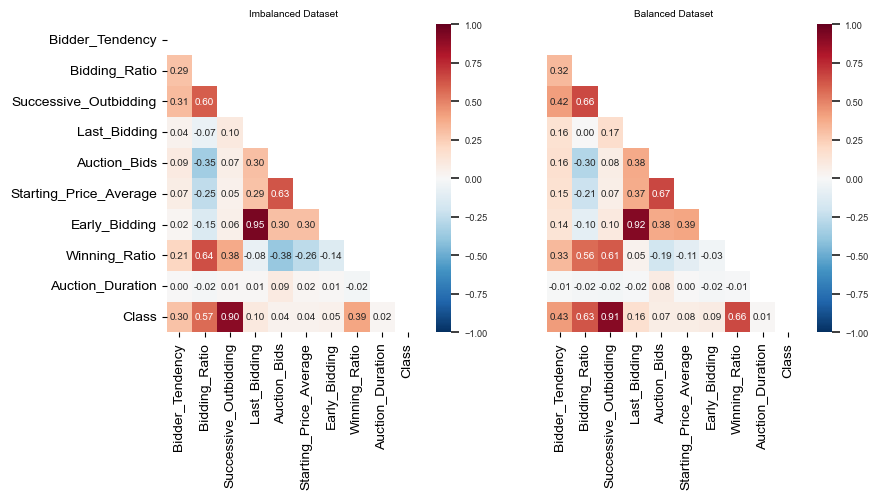

In [15]:
# Computing the correlations from imbalanced data set
corr_before_sampling = df_clean.corr()

# Creating a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_before_sampling, dtype=bool))

# Plotting the heatmap with the mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sns.set(font_scale=0.6)

sns.heatmap(
    corr_before_sampling, annot=True, mask=mask, ax=ax1, fmt='.2f', 
    cmap='RdBu_r', vmin=-1, vmax=1
)

ax1.set_title('Imbalanced Dataset')



# Computing the correlations using X_train and y_train
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)
corr_after_sampling = balanced_df.corr()

# Creating a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_after_sampling, dtype=bool))

# Plotting the heatmap with the mask
sns.heatmap(
    corr_after_sampling, annot=True, mask=mask, ax=ax2, fmt='.2f', 
    cmap='RdBu_r', vmin=-1, vmax=1, yticklabels=False
)

ax2.set_title('Balanced Dataset')



plt.subplots_adjust(wspace=0.2)
plt.show()
